In [1]:
import cv2
import shutil
import os
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

# Train Images

In [29]:
train_dataset_images = "leftImg8bit_trainvaltest/leftImg8bit/train"
save_dir_train = "final_dataset/images/train"

In [30]:
os.listdir(train_dataset_images)

['aachen',
 'bochum',
 'bremen',
 'cologne',
 'darmstadt',
 'dusseldorf',
 'erfurt',
 'hamburg',
 'hanover',
 'jena',
 'krefeld',
 'monchengladbach',
 'strasbourg',
 'stuttgart',
 'tubingen',
 'ulm',
 'weimar',
 'zurich']

In [31]:
path = []
for folder in os.listdir(train_dataset_images):
    base_path = os.path.join(train_dataset_images,folder)
    p = os.listdir(base_path)
    temp = []
    for p1 in p:
        temp.append(os.path.join(base_path,p1))
    path+=temp
len(path)

2975

In [32]:
path[5]

'leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000005_000019_leftImg8bit.png'

In [34]:
for p in path:
    shutil.copy(p, os.path.join(save_dir_train,os.path.basename(p)))

## Masks 

In [35]:
!ls

'data preparation.ipynb'   gtFine_trainvaltest.zip
 final_dataset		   leftImg8bit_trainvaltest
 gtFine_trainvaltest	   leftImg8bit_trainvaltest.zip


In [37]:
train_dataset_image_masks = "gtFine_trainvaltest/gtFine/train"
save_dir_train_maks = "final_dataset/masks/train"

In [38]:
os.listdir(train_dataset_image_masks)

['aachen',
 'bochum',
 'bremen',
 'cologne',
 'darmstadt',
 'dusseldorf',
 'erfurt',
 'hamburg',
 'hanover',
 'jena',
 'krefeld',
 'monchengladbach',
 'strasbourg',
 'stuttgart',
 'tubingen',
 'ulm',
 'weimar',
 'zurich']

In [39]:
path = []
for folder in os.listdir(train_dataset_image_masks):
    base_path = os.path.join(train_dataset_image_masks,folder)
    p = os.listdir(base_path)
    temp = []
    for p1 in p:
        if "color" in p1:
            temp.append(os.path.join(base_path,p1))
    path+=temp
len(path)

2975

In [40]:
path[5]

'gtFine_trainvaltest/gtFine/train/aachen/aachen_000005_000019_gtFine_color.png'

In [41]:
for p in path:
    shutil.copy(p, os.path.join(save_dir_train_maks,os.path.basename(p)))

# Test

In [42]:
test_dataset_images = "leftImg8bit_trainvaltest/leftImg8bit/val"
save_dir_test = "final_dataset/images/test"

In [43]:
path = []
for folder in os.listdir(test_dataset_images):
    base_path = os.path.join(test_dataset_images,folder)
    p = os.listdir(base_path)
    temp = []
    for p1 in p:
        temp.append(os.path.join(base_path,p1))
    path+=temp
len(path)

500

In [44]:
for p in path:
    shutil.copy(p, os.path.join(save_dir_test,os.path.basename(p)))

# Masks

In [49]:
test_dataset_image_masks = "gtFine_trainvaltest/gtFine/val"
save_dir_test_maks = "final_dataset/masks_temp/test"

In [50]:
path = []
for folder in os.listdir(test_dataset_image_masks):
    base_path = os.path.join(test_dataset_image_masks,folder)
    p = os.listdir(base_path)
    temp = []
    for p1 in p:
        if "color" in p1:
            temp.append(os.path.join(base_path,p1))
    path+=temp
len(path)

500

In [51]:
for p in path:
    shutil.copy(p, os.path.join(save_dir_test_maks,os.path.basename(p)))

# Processing Masks

In [56]:
ignore_index=255
void_classes = [0, 1, 2, 3, 4, 5, 6, 9, 10, 14, 15, 16, 18, -1]
valid_classes = [ignore_index,7, 8, 11, 12, 13, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
class_names = ['unlabelled', 'road', 'sidewalk', 'building', 'wall', 'fence', 'pole', 'traffic_light', \
               'traffic_sign', 'vegetation', 'terrain', 'sky', 'person', 'rider', 'car', 'truck', 'bus', \
               'caravan','trailer','train', 'motorcycle', 'bicycle']

class_map = dict(zip(valid_classes, range(len(valid_classes))))
n_classes=len(valid_classes)
class_map

{255: 0,
 7: 1,
 8: 2,
 11: 3,
 12: 4,
 13: 5,
 17: 6,
 19: 7,
 20: 8,
 21: 9,
 22: 10,
 23: 11,
 24: 12,
 25: 13,
 26: 14,
 27: 15,
 28: 16,
 29: 17,
 30: 18,
 31: 19,
 32: 20,
 33: 21}

In [57]:
colors = [   [  0,   0,   0],
        [128, 64, 128],
        [244, 35, 232],
        [70, 70, 70],
        [102, 102, 156],
        [190, 153, 153],
        [153, 153, 153],
        [250, 170, 30],
        [220, 220, 0],
        [107, 142, 35],
        [152, 251, 152],
        [0, 130, 180],
        [220, 20, 60],
        [255, 0, 0],
        [0, 0, 142],
        [0, 0, 70],
        [0, 60, 100],
        [0,0,90],
        [0,0,110],
        [0, 80, 100],
        [0, 0, 230],
        [119, 11, 32],
    ]

label_colours = dict(zip(range(n_classes), colors))

In [58]:
label_colours

{0: [0, 0, 0],
 1: [128, 64, 128],
 2: [244, 35, 232],
 3: [70, 70, 70],
 4: [102, 102, 156],
 5: [190, 153, 153],
 6: [153, 153, 153],
 7: [250, 170, 30],
 8: [220, 220, 0],
 9: [107, 142, 35],
 10: [152, 251, 152],
 11: [0, 130, 180],
 12: [220, 20, 60],
 13: [255, 0, 0],
 14: [0, 0, 142],
 15: [0, 0, 70],
 16: [0, 60, 100],
 17: [0, 0, 90],
 18: [0, 0, 110],
 19: [0, 80, 100],
 20: [0, 0, 230],
 21: [119, 11, 32]}

In [59]:

def encode_segmap(mask):
    #remove unwanted classes and recitify the labels of wanted classes
    for _voidc in void_classes:
        mask[mask == _voidc] = ignore_index
    for _validc in valid_classes:
        mask[mask == _validc] = class_map[_validc]
    return mask

In [60]:
def decode_segmap(temp):
    #convert gray scale to color
    temp=temp.numpy()
    r = temp.copy()
    g = temp.copy()
    b = temp.copy()
    for l in range(0, n_classes):
        r[temp == l] = label_colours[l][0]
        g[temp == l] = label_colours[l][1]
        b[temp == l] = label_colours[l][2]

    rgb = np.zeros((temp.shape[0], temp.shape[1], 3))
    rgb[:, :, 0] = r / 255.0
    rgb[:, :, 1] = g / 255.0
    rgb[:, :, 2] = b / 255.0
    return rgb

In [80]:
sample_masks = os.listdir(save_dir_test_maks)

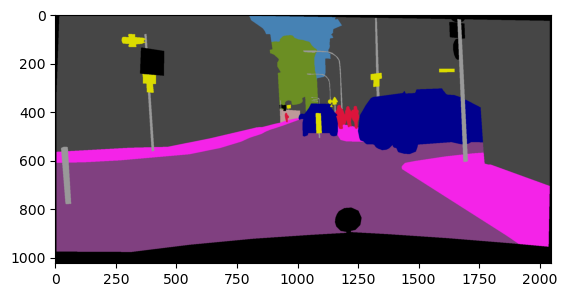

In [142]:
img = Image.open(os.path.join(save_dir_test_maks,sample_masks[0]))
plt.imshow(img)

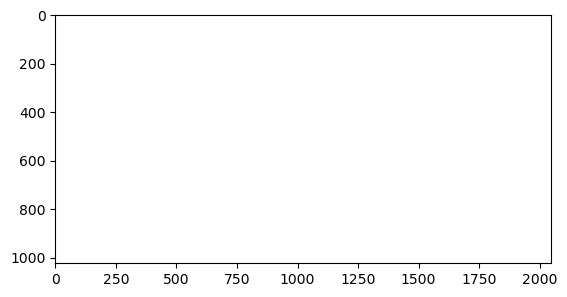

In [71]:
encoded_image = encode_segmap(np.array(img))
plt.imshow(encoded_image)

In [74]:
set(encoded_image.flatten().tolist())

{0, 8, 35, 60, 64, 70, 107, 128, 130, 142, 153, 180, 190, 220, 232, 244}

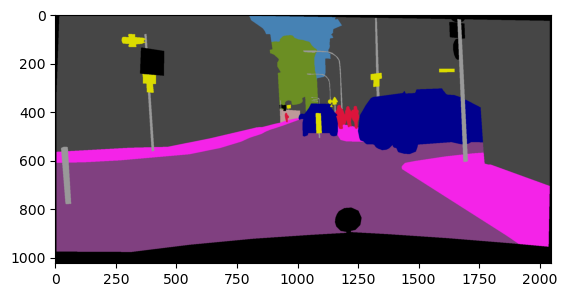

In [94]:
test = cv2.imread(os.path.join(save_dir_test_maks,sample_masks[0]))
og_img = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB))

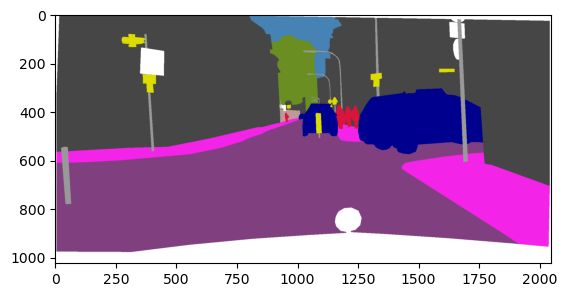

In [101]:
r1,g1,b1 = 0,0,0
r2,g2,b2 = 255,255,255
red, green, blue = og_img[:,:,0], og_img[:,:,1], og_img[:,:,2]
mask = (red == r1) & (green == g1) & (blue == b1)
og_img[:,:,:3][mask] = [r2, g2, b2]
plt.imshow(og_img)

In [99]:
og_img.shape

(1024, 2048, 3)

In [61]:

labels = [
    #       name                id    trainId   category            catId     hasInstances   ignoreInEval   color
    (  'unlabeled'            ,  0 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    (  'ego vehicle'          ,  1 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    (  'rectification border' ,  2 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    (  'out of roi'           ,  3 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    (  'static'               ,  4 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    (  'dynamic'              ,  5 ,      255 , 'void'            , 0       , False        , True         , (111, 74,  0) ),
    (  'ground'               ,  6 ,      255 , 'void'            , 0       , False        , True         , ( 81,  0, 81) ),
    (  'road'                 ,  7 ,        0 , 'flat'            , 1       , False        , False        , (128, 64,128) ),
    (  'sidewalk'             ,  8 ,        1 , 'flat'            , 1       , False        , False        , (244, 35,232) ),
    (  'parking'              ,  9 ,      255 , 'flat'            , 1       , False        , True         , (250,170,160) ),
    (  'rail track'           , 10 ,      255 , 'flat'            , 1       , False        , True         , (230,150,140) ),
    (  'building'             , 11 ,        2 , 'construction'    , 2       , False        , False        , ( 70, 70, 70) ),
    (  'wall'                 , 12 ,        3 , 'construction'    , 2       , False        , False        , (102,102,156) ),
    (  'fence'                , 13 ,        4 , 'construction'    , 2       , False        , False        , (190,153,153) ),
    (  'guard rail'           , 14 ,      255 , 'construction'    , 2       , False        , True         , (180,165,180) ),
    (  'bridge'               , 15 ,      255 , 'construction'    , 2       , False        , True         , (150,100,100) ),
    (  'tunnel'               , 16 ,      255 , 'construction'    , 2       , False        , True         , (150,120, 90) ),
    (  'pole'                 , 17 ,        5 , 'object'          , 3       , False        , False        , (153,153,153) ),
    (  'polegroup'            , 18 ,      255 , 'object'          , 3       , False        , True         , (153,153,153) ),
    (  'traffic light'        , 19 ,        6 , 'object'          , 3       , False        , False        , (250,170, 30) ),
    (  'traffic sign'         , 20 ,        7 , 'object'          , 3       , False        , False        , (220,220,  0) ),
    (  'vegetation'           , 21 ,        8 , 'nature'          , 4       , False        , False        , (107,142, 35) ),
    (  'terrain'              , 22 ,        9 , 'nature'          , 4       , False        , False        , (152,251,152) ),
    (  'sky'                  , 23 ,       10 , 'sky'             , 5       , False        , False        , ( 70,130,180) ),
    (  'person'               , 24 ,       11 , 'human'           , 6       , True         , False        , (220, 20, 60) ),
    (  'rider'                , 25 ,       12 , 'human'           , 6       , True         , False        , (255,  0,  0) ),
    (  'car'                  , 26 ,       13 , 'vehicle'         , 7       , True         , False        , (  0,  0,142) ),
    (  'truck'                , 27 ,       14 , 'vehicle'         , 7       , True         , False        , (  0,  0, 70) ),
    (  'bus'                  , 28 ,       15 , 'vehicle'         , 7       , True         , False        , (  0, 60,100) ),
    (  'caravan'              , 29 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0, 90) ),
    (  'trailer'              , 30 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0,110) ),
    (  'train'                , 31 ,       16 , 'vehicle'         , 7       , True         , False        , (  0, 80,100) ),
    (  'motorcycle'           , 32 ,       17 , 'vehicle'         , 7       , True         , False        , (  0,  0,230) ),
    (  'bicycle'              , 33 ,       18 , 'vehicle'         , 7       , True         , False        , (119, 11, 32) ),
    (  'license plate'        , -1 ,       -1 , 'vehicle'         , 7       , False        , True         , (  0,  0,142) ),
    (  'animals'              , 35 ,       19 , 'animal'          , 8       ,False         , False        , (  0,255,255) )    
]


In [62]:
label_dict = {}
for i in range(len(labels)):
    label_dict[labels[i][0]] = labels[i][7]
label_dict

{'unlabeled': (0, 0, 0),
 'ego vehicle': (0, 0, 0),
 'rectification border': (0, 0, 0),
 'out of roi': (0, 0, 0),
 'static': (0, 0, 0),
 'dynamic': (111, 74, 0),
 'ground': (81, 0, 81),
 'road': (128, 64, 128),
 'sidewalk': (244, 35, 232),
 'parking': (250, 170, 160),
 'rail track': (230, 150, 140),
 'building': (70, 70, 70),
 'wall': (102, 102, 156),
 'fence': (190, 153, 153),
 'guard rail': (180, 165, 180),
 'bridge': (150, 100, 100),
 'tunnel': (150, 120, 90),
 'pole': (153, 153, 153),
 'polegroup': (153, 153, 153),
 'traffic light': (250, 170, 30),
 'traffic sign': (220, 220, 0),
 'vegetation': (107, 142, 35),
 'terrain': (152, 251, 152),
 'sky': (70, 130, 180),
 'person': (220, 20, 60),
 'rider': (255, 0, 0),
 'car': (0, 0, 142),
 'truck': (0, 0, 70),
 'bus': (0, 60, 100),
 'caravan': (0, 0, 90),
 'trailer': (0, 0, 110),
 'train': (0, 80, 100),
 'motorcycle': (0, 0, 230),
 'bicycle': (119, 11, 32),
 'license plate': (0, 0, 142),
 'animals': (0, 255, 255)}

In [63]:
color_label = {v:k for k,v in label_dict.items()}
color_label[(0,0,0)] = 'unlabeled'
color_label

{(0, 0, 0): 'unlabeled',
 (111, 74, 0): 'dynamic',
 (81, 0, 81): 'ground',
 (128, 64, 128): 'road',
 (244, 35, 232): 'sidewalk',
 (250, 170, 160): 'parking',
 (230, 150, 140): 'rail track',
 (70, 70, 70): 'building',
 (102, 102, 156): 'wall',
 (190, 153, 153): 'fence',
 (180, 165, 180): 'guard rail',
 (150, 100, 100): 'bridge',
 (150, 120, 90): 'tunnel',
 (153, 153, 153): 'polegroup',
 (250, 170, 30): 'traffic light',
 (220, 220, 0): 'traffic sign',
 (107, 142, 35): 'vegetation',
 (152, 251, 152): 'terrain',
 (70, 130, 180): 'sky',
 (220, 20, 60): 'person',
 (255, 0, 0): 'rider',
 (0, 0, 142): 'license plate',
 (0, 0, 70): 'truck',
 (0, 60, 100): 'bus',
 (0, 0, 90): 'caravan',
 (0, 0, 110): 'trailer',
 (0, 80, 100): 'train',
 (0, 0, 230): 'motorcycle',
 (119, 11, 32): 'bicycle',
 (0, 255, 255): 'animals'}

In [66]:
mask_mapping = {}
unique_colors = sorted(list(set(label_dict.values())))
mask_mapping = dict(zip(unique_colors, range(len(unique_colors))))

def encode_mask(img,mask_mapping,show=False):
    temp = img.copy()
    for k in mask_mapping:
        temp[(temp == k).all(axis=2)] = mask_mapping[k]
    if show:
        plt.imshow(temp)
        plt.show()
    return temp

In [67]:
mask_mapping

{(0, 0, 0): 0,
 (0, 0, 70): 1,
 (0, 0, 90): 2,
 (0, 0, 110): 3,
 (0, 0, 142): 4,
 (0, 0, 230): 5,
 (0, 60, 100): 6,
 (0, 80, 100): 7,
 (0, 255, 255): 8,
 (70, 70, 70): 9,
 (70, 130, 180): 10,
 (81, 0, 81): 11,
 (102, 102, 156): 12,
 (107, 142, 35): 13,
 (111, 74, 0): 14,
 (119, 11, 32): 15,
 (128, 64, 128): 16,
 (150, 100, 100): 17,
 (150, 120, 90): 18,
 (152, 251, 152): 19,
 (153, 153, 153): 20,
 (180, 165, 180): 21,
 (190, 153, 153): 22,
 (220, 20, 60): 23,
 (220, 220, 0): 24,
 (230, 150, 140): 25,
 (244, 35, 232): 26,
 (250, 170, 30): 27,
 (250, 170, 160): 28,
 (255, 0, 0): 29}

In [68]:
inverse_mask_mapping = {v: k for k, v in mask_mapping.items()}
inverse_mask_mapping

{0: (0, 0, 0),
 1: (0, 0, 70),
 2: (0, 0, 90),
 3: (0, 0, 110),
 4: (0, 0, 142),
 5: (0, 0, 230),
 6: (0, 60, 100),
 7: (0, 80, 100),
 8: (0, 255, 255),
 9: (70, 70, 70),
 10: (70, 130, 180),
 11: (81, 0, 81),
 12: (102, 102, 156),
 13: (107, 142, 35),
 14: (111, 74, 0),
 15: (119, 11, 32),
 16: (128, 64, 128),
 17: (150, 100, 100),
 18: (150, 120, 90),
 19: (152, 251, 152),
 20: (153, 153, 153),
 21: (180, 165, 180),
 22: (190, 153, 153),
 23: (220, 20, 60),
 24: (220, 220, 0),
 25: (230, 150, 140),
 26: (244, 35, 232),
 27: (250, 170, 30),
 28: (250, 170, 160),
 29: (255, 0, 0)}

In [69]:
def decode_mask(img,inverse_mask_mapping,show=False):
    temp = img.copy()
    for k in inverse_mask_mapping:
        temp[(temp == k).all(axis=2)] = inverse_mask_mapping[k]
    if show:
        plt.imshow(temp)
        plt.show()
    return temp

# Create modified label Masks:

## Train

In [86]:
rgb_masks_train = "animal_gta_2/mask_temp/test"
save_path_train = "animal_gta_2/mask/test"

In [87]:
len(os.listdir(rgb_masks_train))

360

In [84]:
def create_modified_masks(p):
    ip_path = os.path.join(rgb_masks_train,p)
    op_path = os.path.join(save_path_train,p)
    bgr = cv2.imread(ip_path)
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    encoded_image = encode_mask(rgb,mask_mapping,False)
    im = Image.fromarray(encoded_image)
    im.save(op_path)
    return 0

In [88]:
create_modified_masks(os.listdir(rgb_masks_train)[0])

0

In [89]:
start = time.time()
with multiprocessing.Pool(multiprocessing.cpu_count()) as p:
    ans = p.map(create_modified_masks, os.listdir(rgb_masks_train))
end = time.time()
print(f"Time taken to create modified masks: {end-start}")

Time taken to create modified masks: 191.23895025253296


Time taken for creating the training set: ~1900sec

In [174]:
for p in os.listdir(rgb_masks_train):
    ip_path = os.path.join(rgb_masks_train,p)
    op_path = os.path.join(save_path_train,p)
    bgr = cv2.imread(ip_path)
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    encoded_image = encode_mask(rgb,mask_mapping,False)
    im = Image.fromarray(encoded_image)
    im.save(op_path)

## Test

In [175]:
rgb_masks_test = "animal_gta/masks_temp/test"
save_path_test = "animal_gta/masks/test"

In [176]:
for p in os.listdir(rgb_masks_test):
    ip_path = os.path.join(rgb_masks_test,p)
    op_path = os.path.join(save_path_test,p)
    bgr = cv2.imread(ip_path)
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    encoded_image = encode_mask(rgb,mask_mapping,False)
    im = Image.fromarray(encoded_image)
    im.save(op_path)
        

In [200]:
color_label

{(0, 0, 0): 'unlabeled',
 (111, 74, 0): 'dynamic',
 (81, 0, 81): 'ground',
 (128, 64, 128): 'road',
 (244, 35, 232): 'sidewalk',
 (250, 170, 160): 'parking',
 (230, 150, 140): 'rail track',
 (70, 70, 70): 'building',
 (102, 102, 156): 'wall',
 (190, 153, 153): 'fence',
 (180, 165, 180): 'guard rail',
 (150, 100, 100): 'bridge',
 (150, 120, 90): 'tunnel',
 (153, 153, 153): 'polegroup',
 (250, 170, 30): 'traffic light',
 (220, 220, 0): 'traffic sign',
 (107, 142, 35): 'vegetation',
 (152, 251, 152): 'terrain',
 (70, 130, 180): 'sky',
 (220, 20, 60): 'person',
 (255, 0, 0): 'rider',
 (0, 0, 142): 'license plate',
 (0, 0, 70): 'truck',
 (0, 60, 100): 'bus',
 (0, 0, 90): 'caravan',
 (0, 0, 110): 'trailer',
 (0, 80, 100): 'train',
 (0, 0, 230): 'motorcycle',
 (119, 11, 32): 'bicycle'}

In [90]:
mask_mapping

{(0, 0, 0): 0,
 (0, 0, 70): 1,
 (0, 0, 90): 2,
 (0, 0, 110): 3,
 (0, 0, 142): 4,
 (0, 0, 230): 5,
 (0, 60, 100): 6,
 (0, 80, 100): 7,
 (0, 255, 255): 8,
 (70, 70, 70): 9,
 (70, 130, 180): 10,
 (81, 0, 81): 11,
 (102, 102, 156): 12,
 (107, 142, 35): 13,
 (111, 74, 0): 14,
 (119, 11, 32): 15,
 (128, 64, 128): 16,
 (150, 100, 100): 17,
 (150, 120, 90): 18,
 (152, 251, 152): 19,
 (153, 153, 153): 20,
 (180, 165, 180): 21,
 (190, 153, 153): 22,
 (220, 20, 60): 23,
 (220, 220, 0): 24,
 (230, 150, 140): 25,
 (244, 35, 232): 26,
 (250, 170, 30): 27,
 (250, 170, 160): 28,
 (255, 0, 0): 29}

## Creating class_label_file

In [91]:
f = open(os.path.join(os.curdir,"animal_gta_2","class_dict_seg.txt"),"w")
f.write("name,r,g,b\n")
for k in mask_mapping:
    f.write(f"{color_label[k]},{k[0]},{k[1]},{k[2]}\n")
f.close()

In [204]:
!pwd

/mnt/e/UofU/Spring 2023/CS 6958 Visual Recognition/Test/cityscapes


# Test

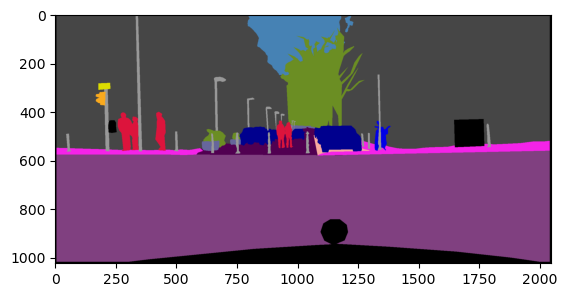

In [170]:
test = cv2.imread(os.path.join(rgb_masks_train,p))
og_img = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
plt.imshow(og_img)

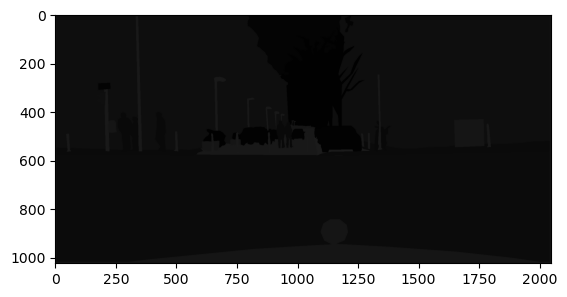

{1, 2, 3, 4, 8, 9, 10, 11, 14, 15, 21, 24, 25, 27}

In [162]:
test = cv2.imread(os.path.join(save_path_train,p))
og_img = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
encoded_image = encode_mask(og_img,mask_mapping,True)
set(encoded_image.flatten())

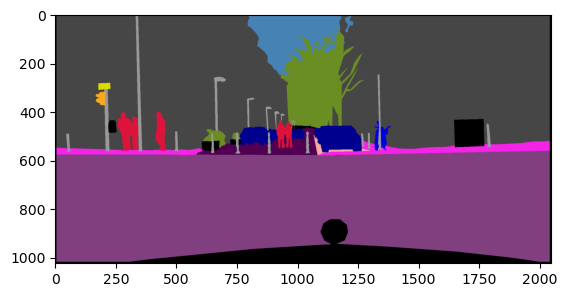

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [191]:
decode_mask(encoded_image,inverse_mask_mapping,True)

# Stiching Images

In [3]:
import shutil

In [2]:
!pwd

/home/mss/Documents/visual_recognition


In [4]:
GTA_images_path = "gta/01_images/images"
GTA_masks_path = "gta/01_labels/labels"
animals_images_path = "animals/rgb/"
animals_masks_path = "animals/masks/"

In [9]:
simple_folders = []
for p in os.listdir(animals_images_path):
    if "simple" in p:
        simple_folders.append(p)
for p in simple_folders:
    if not os.path.exists(os.path.join(animals_masks_path,p)):
        os.makedirs(os.path.join(animals_masks_path,p))
    rgb_dir = os.path.join(animals_images_path,p)
    file_names = os.listdir(rgb_dir)
    #print(p,file_names)
    animal_name = p.replace("_simple","")
    print(animal_name,len(file_names))
    for fn in file_names:
        dst = os.path.join(animals_masks_path,animal_name+"_simple",fn)
        src = os.path.join(animals_masks_path,animal_name,fn)
        #print(src,dst)
        shutil.copy(src, dst)

bear 20
bird 41
cow 43
elephant 19
giraffe 18
horse 16
sheep 24
zebra 20


In [7]:
simple_folders

['bear_simple',
 'cow_simple',
 'elephant_simple',
 'giraffe_simple',
 'horse_simple',
 'sheep_simple',
 'zebra_simple']

# Overlapping Images

In [37]:
from random import randint
import random

In [38]:
def add_transparent_image(background_path, foreground_path, x_offset=200, y_offset=200):
    background = cv2.imread(background_path)
    foreground = cv2.imread(foreground_path,cv2.IMREAD_UNCHANGED)
    bg_h, bg_w, bg_channels = background.shape
    fg_h, fg_w, fg_channels = foreground.shape

    assert bg_channels == 3, f'background image should have exactly 3 channels (RGB). found:{bg_channels}'
    assert fg_channels == 4, f'foreground image should have exactly 4 channels (RGBA). found:{fg_channels}'

    # center by default
    if x_offset is None: x_offset = (bg_w - fg_w) // 2
    if y_offset is None: y_offset = (bg_h - fg_h) // 2

    w = min(fg_w, bg_w, fg_w + x_offset, bg_w - x_offset)
    h = min(fg_h, bg_h, fg_h + y_offset, bg_h - y_offset)

    if w < 1 or h < 1: return

    # clip foreground and background images to the overlapping regions
    bg_x = max(0, x_offset)
    bg_y = max(0, y_offset)
    fg_x = max(0, x_offset * -1)
    fg_y = max(0, y_offset * -1)
    foreground = foreground[fg_y:fg_y + h, fg_x:fg_x + w]
    background_subsection = background[bg_y:bg_y + h, bg_x:bg_x + w]

    # separate alpha and color channels from the foreground image
    foreground_colors = foreground[:, :, :3]
    alpha_channel = foreground[:, :, 3] / 255  # 0-255 => 0.0-1.0

    # construct an alpha_mask that matches the image shape
    alpha_mask = np.dstack((alpha_channel, alpha_channel, alpha_channel))

    # combine the background with the overlay image weighted by alpha
    composite = background_subsection * (1 - alpha_mask) + foreground_colors * alpha_mask
    background[bg_y:bg_y + h, bg_x:bg_x + w] = composite
    return background
    # overwrite the section of the background image that has been updated

In [39]:
animals  = ["bear", "elephant", "giraffe", "horse", "cow", "bird", "zebra", "sheep"]
animal_count = {k:0 for k in animals}

In [78]:
input_ = sorted(os.listdir(GTA_images_path),reverse=True)
len(input_)

3000

In [80]:
def create_animal_gta(im):
    save_dir = "animal_gta_2/"
    animals  = ["bear", "elephant", "giraffe", "horse", "cow", "bird", "zebra", "sheep"]
    animal_count = {k:0 for k in animals}
    GTA_images_path = "gta/01_images/images"
    GTA_masks_path = "gta/01_labels/labels"
    animals_images_path = "animals/rgb/"
    animals_masks_path = "animals/masks/"

    bg_img_path = os.path.join(GTA_images_path,im)
    bg_ms_path = os.path.join(GTA_masks_path,im)
    a  = random.choice(animals)
    animal_count[a]+=1
    fg_img_dir = os.path.join(animals_images_path,a+"_simple")
    a_img = random.choice(os.listdir(fg_img_dir))
    fg_img_path = os.path.join(fg_img_dir,a_img)
    fg_ms_path = os.path.join(animals_masks_path,a+"_simple",a_img)
    x,y  = randint(100,1200), randint(150,800)
    final_img = add_transparent_image(bg_img_path, fg_img_path, x, y)
    final_mask = add_transparent_image(bg_ms_path, fg_ms_path, x, y)

    cv2.imwrite(os.path.join(save_dir,"images","test",im), final_img)
    cv2.imwrite(os.path.join(save_dir,"mask_temp","test",im), final_mask)
    return animal_count

In [77]:
create_animal_gta(input_[0])

{'bear': 0,
 'elephant': 1,
 'giraffe': 0,
 'horse': 0,
 'cow': 0,
 'bird': 0,
 'zebra': 0,
 'sheep': 0}

In [81]:
import multiprocessing
import time
start = time.time()
with multiprocessing.Pool(multiprocessing.cpu_count()) as p:
    ans = p.map(create_animal_gta, input_[0:360])
end = time.time()
print(f"Time taken: {end-start}")

Time taken: 21.997922658920288


"Time taken for training set: ~sec 240 "

In [161]:
save_dir = "animal_gta_2/"

for c,im in enumerate(os.listdir(GTA_images_path)):
    if c%50==0:
        print(f"{c} images generated")
    if c>300:
        continue
    bg_img_path = os.path.join(GTA_images_path,im)
    bg_ms_path = os.path.join(GTA_masks_path,im)
    a  = random.choice(animals)
    animal_count[a]+=1
    fg_img_dir = os.path.join(animals_images_path,a+"_simple")
    a_img = random.choice(os.listdir(fg_img_dir))
    fg_img_path = os.path.join(fg_img_dir,a_img)
    fg_ms_path = os.path.join(animals_masks_path,a+"_simple",a_img)
    x,y  = randint(200,1000), randint(200,600)
    final_img = add_transparent_image(bg_img_path, fg_img_path, x, y)
    final_mask = add_transparent_image(bg_ms_path, fg_ms_path, x, y)
    
    cv2.imwrite(os.path.join(save_dir,"images","test",im), final_img)
    cv2.imwrite(os.path.join(save_dir,"mask","test",im), final_mask)

0 images generated
50 images generated
100 images generated
150 images generated
200 images generated
250 images generated
300 images generated
350 images generated
400 images generated
450 images generated
500 images generated
550 images generated
600 images generated
650 images generated
700 images generated
750 images generated
800 images generated
850 images generated
900 images generated
950 images generated
1000 images generated
1050 images generated
1100 images generated
1150 images generated
1200 images generated
1250 images generated
1300 images generated
1350 images generated
1400 images generated
1450 images generated
1500 images generated
1550 images generated
1600 images generated
1650 images generated
1700 images generated
1750 images generated
1800 images generated
1850 images generated
1900 images generated
1950 images generated
2000 images generated
2050 images generated
2100 images generated
2150 images generated
2200 images generated
2250 images generated
2300 images

In [159]:
animal_count

{'bear': 489, 'elephant': 507, 'giraffe': 500, 'horse': 476, 'cow': 528}

# Misc

In [133]:
ignore_index=255
valid_classes = []
void_classes  =[]
class_names = ['unlabeled', 'road', 'sidewalk', 'building', 'wall', 'fence', 'pole', 'traffic light', \
               'traffic sign', 'vegetation', 'terrain', 'sky', 'person', 'rider', 'car', 'truck', 'bus', \
               'caravan','trailer','train', 'motorcycle', 'bicycle','ignored']
for i,k in enumerate(label_dict):
    if k in class_names:
        valid_classes.append(i)
    else:
        if i==34:
            i=-1
        void_classes.append(i)
    void_classes.append(ignore_index)

In [134]:
len(class_names)

23

In [135]:
class_map = dict(zip(valid_classes, range(len(valid_classes))))
n_classes=len(valid_classes)
class_map

{0: 0,
 7: 1,
 8: 2,
 11: 3,
 12: 4,
 13: 5,
 17: 6,
 19: 7,
 20: 8,
 21: 9,
 22: 10,
 23: 11,
 24: 12,
 25: 13,
 26: 14,
 27: 15,
 28: 16,
 29: 17,
 30: 18,
 31: 19,
 32: 20,
 33: 21}

In [129]:
valid_color_map = {}
for i,c in enumerate(class_names):
    valid_color_map[label_dict[c]] = c
valid_color_map

{(0, 0, 0): 'unlabeled',
 (128, 64, 128): 'road',
 (244, 35, 232): 'sidewalk',
 (70, 70, 70): 'building',
 (102, 102, 156): 'wall',
 (190, 153, 153): 'fence',
 (153, 153, 153): 'pole',
 (250, 170, 30): 'traffic light',
 (220, 220, 0): 'traffic sign',
 (107, 142, 35): 'vegetation',
 (152, 251, 152): 'terrain',
 (70, 130, 180): 'sky',
 (220, 20, 60): 'person',
 (255, 0, 0): 'rider',
 (0, 0, 142): 'car',
 (0, 0, 70): 'truck',
 (0, 60, 100): 'bus',
 (0, 0, 90): 'caravan',
 (0, 0, 110): 'trailer',
 (0, 80, 100): 'train',
 (0, 0, 230): 'motorcycle',
 (119, 11, 32): 'bicycle'}

In [ ]:
mask_mapping = {
    (255, 255, 0):   0,
    (0, 255, 255):   1,
    (255, 255, 255): 2,
}

def encode_mask(img,label_dict):
    for k in mask_mapping:
        label[(label == k).all(axis=2)] = mask_mapping[k]